In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# read the dataset with RFM and cluster values for each individual customer
df = pd.read_csv("RFM_clusters.csv", index_col = "CustomerID")
df.head()
# these customers are all registered, this data set does not include guest customers in the analysis. 

,Frequency,Monetary,Recency,Cluster
CustomerID,,,,
12347,5.204007,8.368693,0.693147,VIP loyal customers
12348,3.433987,7.494007,4.317488,At-risk
12349,4.290459,7.471676,2.944439,At-risk
12350,2.833213,5.812338,5.736572,One-timers
12352,4.553877,7.343045,3.583519,At-risk


In [67]:
# customers in each cluster
df["Cluster"].value_counts()

Cluster
One-timers             1357
At-risk                1306
VIP loyal customers     848
Regulars                806
Name: count, dtype: int64

In [68]:
# percentage of customers in each clusters
round((df["Cluster"].value_counts())/len(df)*100, 2)

Cluster
One-timers             31.43
At-risk                30.25
VIP loyal customers    19.64
Regulars               18.67
Name: count, dtype: float64

In [87]:
# read the save dataframe from data cleaning process of raw data without missing values
raw = pd.read_csv("raw_no_nan.csv")
raw.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [73]:
# mapping of each customer to its cluster
cluster_map = df["Cluster"].reset_index()

# adding a new column of cluster to each transaction of each customer
raw_clust = raw.merge(cluster_map, on = "CustomerID")
raw_clust.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,At-risk
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,At-risk
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,At-risk
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,At-risk
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,At-risk


In [92]:
# create a dataframe with revenue per transaction
rev = raw_clust.loc[:, ("Quantity", "UnitPrice", "Cluster")]
rev["Revenue"] = rev["Quantity"] * rev["UnitPrice"]

# grouping by cluster and getting the total sum of revenue in each cluster
rev_by_clust = round(rev.groupby("Cluster")["Revenue"].sum(), 2).reset_index()
# percentage of revenue by each cluster
rev_by_clust["Revenue_percent"] = round((rev_by_clust["Revenue"]/sum(rev_by_clust["Revenue"]))*100, 2)

rev_by_clust

,Cluster,Revenue,Revenue_percent
0,At-risk,1802587.61,21.68
1,One-timers,392396.67,4.72
2,Regulars,478488.33,5.76
3,VIP loyal customers,5639822.34,67.84


### Loyal customers contribute to a large percentage of revenue, and at-risk customers are the second-highest revenue generators. It would be worthwhile to invest in marketing to these groups of customers to retain higher revenue. On the other hand, one-timer and regulars generate almost similar and low percentage of revenue. They, in total, generated around 10% of the revenue.

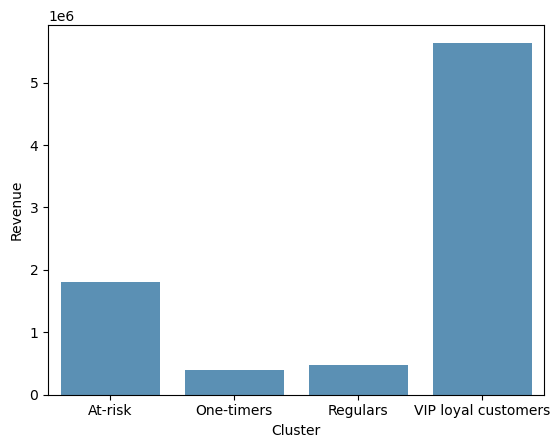

In [93]:
# barplot of how much revenue each cluster of customers generates
sns.barplot(x = "Cluster", y = "Revenue", data = rev_by_clust, alpha = 0.8)
plt.show()

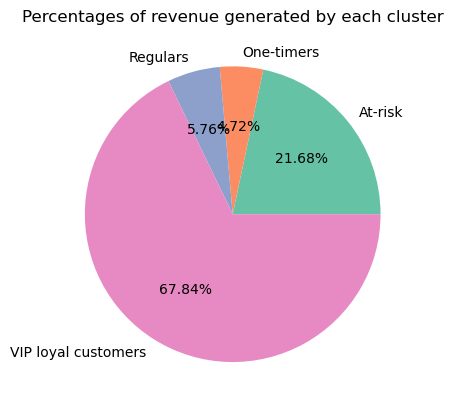

In [94]:
# pie chart for each cluster percentage of revenue
plt.pie(rev_by_clust["Revenue_percent"], labels = rev_by_clust["Cluster"],autopct='%.2f%%', 
        colors = sns.color_palette('Set2'))
plt.title("Percentages of revenue generated by each cluster")
plt.show()

In [95]:
# what products do each cluster buy most (top 5)
top_products = (
    raw_clust.groupby(["Cluster", "Description"])["Quantity"].sum()
      .reset_index()
      .sort_values(["Cluster", "Quantity"], ascending=[True, False])
)

# extract top 5 products for each cluster
top5_products = top_products.groupby("Cluster").head(5)
# reset the index number of data frame
top5_products.reset_index(drop = True, inplace = True)

# save top_products data frame as a csv file
top5_products.to_csv("top5_products_per_cluster.csv", index = False)
top5_products

,Cluster,Description,Quantity
0,At-risk,PACK OF 72 RETROSPOT CAKE CASES,11220
1,At-risk,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10892
2,At-risk,WHITE HANGING HEART T-LIGHT HOLDER,7633
3,At-risk,ASSORTED COLOUR BIRD ORNAMENT,7367
4,At-risk,PACK OF 12 LONDON TISSUES,7037
5,One-timers,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,5586
6,One-timers,BROCADE RING PURSE,4572
7,One-timers,SMALL POPCORN HOLDER,4542
8,One-timers,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4236
9,One-timers,SMALL CHINESE STYLE SCISSOR,3694
